# Práctica 2: Introducción a PyTorch

## a) Calculando el gradiente mediante Autograd

En primer lugar, vamos a calcular del gradiente para el perceptrón simple con función de activación sigmoidea que vimos en la teoría. Pero esta vez, en lugar de realizar manualmente el proceso de backpropagation, vamos a usar el módulo `autograd` de PyTorch.

La función $f(x, w)$ a la cual queremos encontrarle el gradiente es:

> $f(\mathbf{x}, \mathbf{w}) = \frac{1}{1 + e^{-(w_0 x_0 + w_1 x_1 + w_2)}}$

Definimos entonces la función utilizando `torch.tensor` (recordar usar el parámetro `requires_grad = True` para que PyTorch guarde los gradientes) y realizamos la pasada "forward" para los siguientes valores de x y w:

> $\mathbf{x} = (-1, -2)$

> $\mathbf{w} = (2, -3, -3)$



In [ ]:
import torch

x = torch.tensor([-1., -2., 1], requires_grad = True)
w = torch.tensor([2., -3., -3.], requires_grad = True)

f = 1/(1 + torch.exp(-1*(torch.dot(w, x))))

print(f)

tensor(0.7311, grad_fn=<MulBackward0>)


Ahora, utilizando la función `f.backward()` computamos los gradientes $\frac{\partial f}{ \partial \mathbf{x}}$ y $\frac{\partial f}{ \partial \mathbf{w}}$

In [ ]:
# Realizamos la pasada backward, para que compute los gradientes en los nodos hojas.
f.backward()

In [ ]:
# Le pedimos los gradientes de las features y de los pesos
print("Gradiente df/dx = " + str(x.grad))
print("Gradiente df/dw = " + str(w.grad))

Gradiente df/dx = tensor([ 0.3932, -0.5898, -0.5898])
Gradiente df/dw = tensor([-0.1966, -0.3932,  0.1966])


## b) Minimizando una función con Gradient Descent

Ahora, vamos a implementar usar el algorítmo de gradiente descendiente (utilizando Autograd para computar el gradiente) para minimizar la función cuadrática $$f(x) = 2x^2 + x + 4$$

Utilizaremos la implementación `torch.optim.SGD` de gradiente descendiente.



X = tensor([-2.], requires_grad=True), f(x) = tensor([10.], grad_fn=<AddBackward0>)
X = tensor([-1.9930], requires_grad=True), f(x) = tensor([9.9511], grad_fn=<AddBackward0>)
X = tensor([-1.9860], requires_grad=True), f(x) = tensor([9.9026], grad_fn=<AddBackward0>)
X = tensor([-1.9791], requires_grad=True), f(x) = tensor([9.8545], grad_fn=<AddBackward0>)
X = tensor([-1.9722], requires_grad=True), f(x) = tensor([9.8067], grad_fn=<AddBackward0>)
X = tensor([-1.9653], requires_grad=True), f(x) = tensor([9.7594], grad_fn=<AddBackward0>)
X = tensor([-1.9584], requires_grad=True), f(x) = tensor([9.7124], grad_fn=<AddBackward0>)
X = tensor([-1.9516], requires_grad=True), f(x) = tensor([9.6658], grad_fn=<AddBackward0>)
X = tensor([-1.9448], requires_grad=True), f(x) = tensor([9.6195], grad_fn=<AddBackward0>)
X = tensor([-1.9380], requires_grad=True), f(x) = tensor([9.5737], grad_fn=<AddBackward0>)
X = tensor([-1.9312], requires_grad=True), f(x) = tensor([9.5282], grad_fn=<AddBackward0>)
X = te

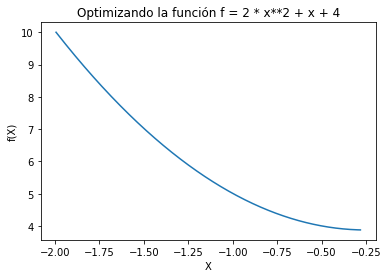

In [ ]:
import matplotlib.pyplot as plt

# Definir la variable que será el parámetro a optimizar
x = torch.tensor([-2.], requires_grad= True)

# Definir el optimizador, indicando el parámetro a optimizar y el learning rate
optimizer = torch.optim.SGD([x], lr = 0.001)

# Acumuladores que usaremos para guardar los valores sucesivos de x, y
f_values = []
x_values = []

# Loop de optimización
for i in range(1000):

    # Setemos en 0 los gradientes de todos los elementos
    optimizer.zero_grad()
       
    # Pasada forward: ejecutar la función a minimizar
    f = 2*(x**2) + x + 4

    print("X = " + str(x) + ", f(x) = " + str(f))

    # Pasada backward: computar los gradientes
    f.backward()

    # Actualizar los pesos dando un paso de gradiente descendiente
    optimizer.step()

    # Guardar los valores para luego plotearlos
    f_values.append(f.data.item())
    x_values.append(x.data.item())

# Ploteo los valores
plt.title("Optimizando la función f = 2 * x**2 + x + 4")
plt.xlabel("X")
plt.ylabel("f(X)")
plt.plot(x_values,f_values);


El minimo de la funcion $f(x) = 2x^2 + x + 4$ lo encuentra en el punto x = -0.2819, el cual esta muy cerca del minimo calculado de forma teorica que es -0.25, corrigiendo el tamaño del step y/o agregando mas iteraciones terminara convergiendo a ese valor.

# c) Implementando un MLP en PyTorch para predicción del porcentaje de grasa corporal

Contamos con una base de datos [1] de 252 mediciones del porcentaje de grasa corporal de 252 personas diferentes, el cual puede ser estimado mediante otras características, como la edad, el peso, y mediciones en diferentes partes del cuerpo. A partir de estos datos se pretende desarrollar un sistema que permita predecir dicho porcentaje a partir de las características.

[1]: Olson, R.S., La Cava, W., Orzechowski, P. et al. PMLB: a large benchmark suite for machine learning evaluation and comparison. BioData Mining 10, 36 (2017). https://epistasislab.github.io/pmlb/profile/560_bodyfat.html

Antes de comenzar, vamos a instalar el paquete de Python que contiene la base de datos:

In [ ]:
pip install pmlb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Ahora vamos a generar un histograma de todas las mediciones del porcentaje con todos los datos disponibles:

Fila de ejemplo:
['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'target']
[  1.0708  23.     154.25    67.75    36.2     93.1     85.2     94.5
  59.      37.3     21.9     32.      27.4     17.1   ]


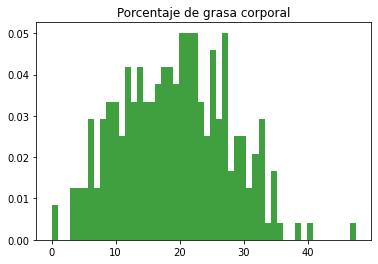

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pmlb import fetch_data

# Importamos el dataset
body_fat = fetch_data('560_bodyfat')
body_fat.describe()

# Extraigo los datos (features) y los porcentajes (etiquetas a predecir)
data = body_fat.loc[:, body_fat.columns != 'target'].to_numpy()
percentages = body_fat.loc[:, body_fat.columns == 'target'].to_numpy()

data = data.astype(np.float32)
percentages = percentages.astype(np.float32)

print("Fila de ejemplo:")
print(list(body_fat.columns))
print(data[0,:])

# Dibujo un histograma del porcentaje de grasa corporal usando todos los datos
_ = plt.hist(percentages , 50, density=True, facecolor='g', alpha=0.75)
_ = plt.title("Porcentaje de grasa corporal")


Particionamos los datos en entrenamiento y prueba usando la función `sklearn.model_selection.train_test_split`

In [ ]:
 from sklearn.model_selection import train_test_split
 
 # Particiono los datos en entrenamiento y prueba usando el método de scikitlearn
 X_train, X_test, y_train, y_test = train_test_split(data, percentages, test_size=0.33, random_state=42)

Ahora implementaremos en PyTorch un Perceptrón multicapa que usaremos como regresor del porcentaje de grasa corporal (ejemplo basado en el curso de [RPI](https://rpi.analyticsdojo.com/)).

El perceptrón deberá contar con 3 capas:
- Las dos primeras con 200 neuronas, y deberán usar la función de activación ReLU.
- La última con una única neurona cuya salida sea un valor escalar que corresponda al porcentaje de grasa corporal estimado de la persona, que no deberá utilizar ninguna función de activación.

Algunas clases de PyTorch que resultarán útiles para implementar el modelo, son:
- `torch.nn.Linear`: Implementa una capa totalmente conectada. Es necesario especificarle el número de parámetros de entrada y de salida.
- `torch.nn.functional.relu`: Implementa la función de activación ReLU.

Además, utilizaremos el optimizador `torch.optim.Adam` y la función de pérdida `torch.nn.MSELoss` (error cuadrático medio).






Epoch 100, loss = 19.973
Epoch 200, loss = 17.495
Epoch 300, loss = 16.0241
Epoch 400, loss = 19.932
Epoch 500, loss = 20.9196
Epoch 600, loss = 14.4253
Epoch 700, loss = 13.8658
Epoch 800, loss = 11.2643
Epoch 900, loss = 11.9691
Epoch 1000, loss = 9.58325
Epoch 1100, loss = 7.15492
Epoch 1200, loss = 7.40194
Epoch 1300, loss = 5.19488
Epoch 1400, loss = 5.68385
Epoch 1500, loss = 3.90582
Epoch 1600, loss = 3.41756
Epoch 1700, loss = 2.91739
Epoch 1800, loss = 3.08762
Epoch 1900, loss = 2.6848
Epoch 2000, loss = 1.44821
Epoch 2100, loss = 1.77801
Epoch 2200, loss = 1.39276
Epoch 2300, loss = 1.18125
Epoch 2400, loss = 1.52536
Epoch 2500, loss = 0.96885
Epoch 2600, loss = 5.55102
Epoch 2700, loss = 0.633288
Epoch 2800, loss = 0.267023
Epoch 2900, loss = 0.578762
Epoch 3000, loss = 0.34042
Epoch 3100, loss = 0.60728
Epoch 3200, loss = 0.266574
Epoch 3300, loss = 0.390539
Epoch 3400, loss = 0.508795
Epoch 3500, loss = 0.235824
Epoch 3600, loss = 1.33438
Epoch 3700, loss = 0.209199
Epoch 

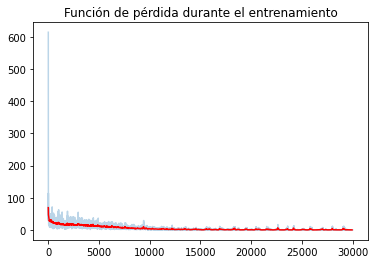

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# Tamaño del batch de entrenamiento
batch_size = 32

# Tasa de aprendizaje inicial para el gradiente descendente
learning_rate = 1e-3

class Net(torch.nn.Module):
    def __init__(self, input_features, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(input_features, size_hidden, bias = True)
        self.hidden2 = nn.Linear(size_hidden, size_hidden   , bias = True)
        self.out     = nn.Linear(size_hidden, n_output      , bias = True)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.out(x)
        return x

# Definimos el modelo del perceptrón
net = Net(input_features = X_train.shape[1] , size_hidden = 200, n_output = 1) 

# Construimos el optimizador, y le indicamos que los parámetros a optimizar 
# son los del modelo definido: net.parameters()

optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Definimos también la función de pérdida a utilizar
criterion = nn.MSELoss()

# Creamos el objeto dataset que empaqueta los array de numpy para que puedan 
# ser leidos por PyTorch
dataset = TensorDataset(torch.from_numpy(X_train).clone(), torch.from_numpy(y_train).clone())

# Creamos un loader iterable indicandole que debe leer los datos a partir de
# del dataset creado en el paso anterior. Este objeto puede ser iterado
# y nos devuelve de a 1 batch (x, y).
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# Número de épocas
num_epochs = 5000

# Lista en la que iremos guardando el valor de la función de pérdida en cada 
# etapa de entrenamiento
loss_list = []

# Bucle de entrenamiento
for i in range(num_epochs):

    total_loss = 0.0
    for x, y in loader:
        # Seteo en cero los gradientes de los parámetros a optimizar
        optimizer.zero_grad()

        # Realizo la pasada forward por la red
        prediccion = net(x)
        loss = criterion(prediccion, y)
        
        # Realizo la pasada backward por la red        
        loss.backward()
        
        # Actualizo los pesos de la red con el optimizador
        optimizer.step()

        # Me guardo el valor actual de la función de pérdida para luego graficarlo
        loss_list.append(loss.data.item())

        # Acumulo la loss del minibatch
        total_loss += loss.item() * y.size(0)

    # Normalizo la loss total   
    total_loss/= len(loader.dataset)

    # Muestro el valor de la función de pérdida cada 100 iteraciones        
    if i > 0 and i % 100 == 0:
        print('Epoch %d, loss = %g' % (i, total_loss))

# Muestro la lista que contiene los valores de la función de pérdida
# y una versión suavizada (rojo) para observar la tendencia
plt.figure()
loss_np_array = np.array(loss_list)
plt.plot(loss_np_array, alpha = 0.3)
N = 60
running_avg_loss = np.convolve(loss_np_array, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_loss, color='red')
plt.title("Función de pérdida durante el entrenamiento");

MSE medio en training: 0.053125985
MSE medio en test: 34.58567


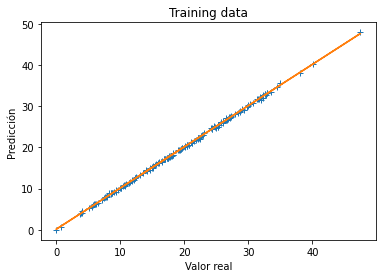

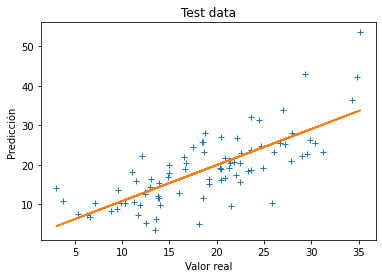

In [ ]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm

# Definimos un método para mostrar las predicciones como un scatter plot 
# y graficamos la recta de regresión para esos datos.
def plotScatter(x_data, y_data, title, fit_line=True):
  plt.figure()
  
  plt.plot(x_data, y_data, '+')
  plt.xlabel('Valor real')
  plt.ylabel('Predicción')
  plt.title(title)

  if fit_line:
    X, Y = x_data.reshape(-1,1), y_data.reshape(-1,1)
    plt.plot( X, LinearRegression().fit(X, Y).predict(X) )

# Dibujamos el ground truth vs las predicciones en los datos de entrenamiento
py = net(torch.FloatTensor(X_train))
y_pred_train = py.cpu().detach().numpy()
plotScatter(y_train, y_pred_train, "Training data")

# Dibujamos el ground truth vs las predicciones en los datos de test
py = net(torch.FloatTensor(X_test))
y_pred_test = py.cpu().detach().numpy()
plotScatter(y_test, y_pred_test, "Test data")

print ("MSE medio en training: " + str(((y_train - y_pred_train)**2).mean()))
print ("MSE medio en test: " + str(((y_test - y_pred_test)**2).mean()))

# Entregable 
1. Encontrar el mínimo de la función *f* definida en el apartado b). Para ello, deberán encontrar primero la derivada *f'(x)* de forma analítica, y utilizarla para computar el mínimo de la función. Posteriormente, deberán corrobarar que el valor coincida con el que obtuvieron optimizando la función con gradiente descendiente. 

### Respuesta

$f(x) = 2x^2 + x + 4$

$\frac{df}{dx}=4 x + 1$

$\frac{df}{dx}= 0$

$4 x + 1 = 0$

$x = -\frac{1}{4}$

Rta: Encontramos de manera analitica el minimo de la funcion *f* en el punto x = $-\frac{1}{4}$. Utilizando el descenso de gradiente a partir de la funcion torch.optim.SGD del framework pytorch, encontramos que luego de 1000 iteraciones, con un learning rate de 0.001 y con una semilla inicial de x = -2, el minimo de la funcion lo encuentra para x = -0.2819, el cual esta muy cerca del minimo calculado de forma teorica, corrigiendo el tamaño del step y/o agregando mas iteraciones, probablemente terminara convergiendo a ese valor. 



 

2. Compara el rendimiento de 3 perceptrones multicapa que varíen en la cantidad de neuronas en sus capas intermedia. Probar colocando 2, 10 y 200 neuronas en dichas capas, al entrenar los perceptrones durante 5000 épocas. Mostrar los resultados utilizando:

* los gráficos de dispersión con la recta de regresión
* el error medio en los datos de entrenamiento y test

  Analizar la relación entre dichos resultados y la cantidad de neuronas que posee el perceptrón.

  ## PERCEPTRON A : 2 NEURONAS

Debido a la baja cantidad de neuronas que posee el modelo, para que logre aprender (reducir la funcion de costo), bajar el learning rate a 1e-4, para que converja la funcion de costo, y tenga un performance aceptable.

Epoch 100, loss = 399.939
Epoch 200, loss = 127.147
Epoch 300, loss = 55.0653
Epoch 400, loss = 54.5252
Epoch 500, loss = 54.2549
Epoch 600, loss = 53.8998
Epoch 700, loss = 53.4841
Epoch 800, loss = 52.981
Epoch 900, loss = 52.4129
Epoch 1000, loss = 51.7857
Epoch 1100, loss = 51.0874
Epoch 1200, loss = 50.3316
Epoch 1300, loss = 49.5337
Epoch 1400, loss = 48.6712
Epoch 1500, loss = 47.7437
Epoch 1600, loss = 46.778
Epoch 1700, loss = 45.7277
Epoch 1800, loss = 44.574
Epoch 1900, loss = 43.3448
Epoch 2000, loss = 42.0178
Epoch 2100, loss = 40.6326
Epoch 2200, loss = 39.1818
Epoch 2300, loss = 37.6733
Epoch 2400, loss = 36.4331
Epoch 2500, loss = 35.2339
Epoch 2600, loss = 34.0777
Epoch 2700, loss = 33.0005
Epoch 2800, loss = 32.0003
Epoch 2900, loss = 31.0788
Epoch 3000, loss = 30.2726
Epoch 3100, loss = 29.5489
Epoch 3200, loss = 28.9645
Epoch 3300, loss = 28.4726
Epoch 3400, loss = 28.0958
Epoch 3500, loss = 27.8488
Epoch 3600, loss = 27.5535
Epoch 3700, loss = 27.338
Epoch 3800, lo

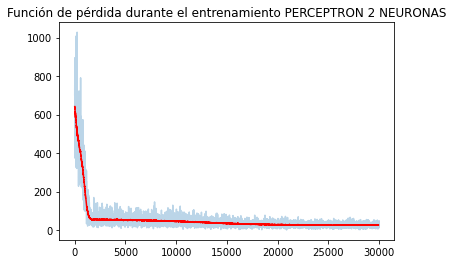

In [ ]:
# Tamaño del batch de entrenamiento
batch_size = 32

# Tasa de aprendizaje inicial para el gradiente descendente
learning_rate = 1e-4

# Definimos el modelo del perceptrón
net_a = Net(input_features = X_train.shape[1] , size_hidden = 2, n_output = 1) 

# Construimos el optimizador, y le indicamos que los parámetros a optimizar 
# son los del modelo definido: net.parameters()

optimizer_a = torch.optim.Adam(net_a.parameters(), lr=learning_rate)

# Definimos también la función de pérdida a utilizar
criterion = nn.MSELoss()

# Creamos el objeto dataset que empaqueta los array de numpy para que puedan 
# ser leidos por PyTorch
dataset = TensorDataset(torch.from_numpy(X_train).clone(), torch.from_numpy(y_train).clone())

# Creamos un loader iterable indicandole que debe leer los datos a partir de
# del dataset creado en el paso anterior. Este objeto puede ser iterado
# y nos devuelve de a 1 batch (x, y).
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# Número de épocas
num_epochs = 5000

loss_list = []

# Bucle de entrenamiento
for i in range(num_epochs):

    total_loss = 0.0
    for x, y in loader:
        # Seteo en cero los gradientes de los parámetros a optimizar
        optimizer_a.zero_grad()

        # Realizo la pasada forward por la red
        prediccion = net_a(x)
        loss = criterion(prediccion, y)
        
        # Realizo la pasada backward por la red        
        loss.backward()
        
        # Actualizo los pesos de la red con el optimizador
        optimizer_a.step()

        # Me guardo el valor actual de la función de pérdida para luego graficarlo
        loss_list.append(loss.data.item())

        # Acumulo la loss del minibatch
        total_loss += loss.item() * y.size(0)

    # Normalizo la loss total   
    total_loss/= len(loader.dataset)

    # Muestro el valor de la función de pérdida cada 100 iteraciones        
    if i > 0 and i % 100 == 0:
        print('Epoch %d, loss = %g' % (i, total_loss))

# Muestro la lista que contiene los valores de la función de pérdida
# y una versión suavizada (rojo) para observar la tendencia
plt.figure()
loss_np_array = np.array(loss_list)
plt.plot(loss_np_array, alpha = 0.3)
N = 60
running_avg_loss = np.convolve(loss_np_array, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_loss, color='red')
plt.title("Función de pérdida durante el entrenamiento PERCEPTRON 2 NEURONAS");


MSE medio en training PERCEPTRON 2 NEURONAS: 25.949646
MSE medio en test PERCEPTRON 2 NEURONAS: 27.032328


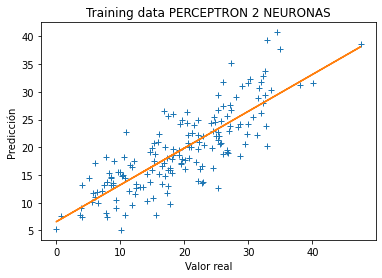

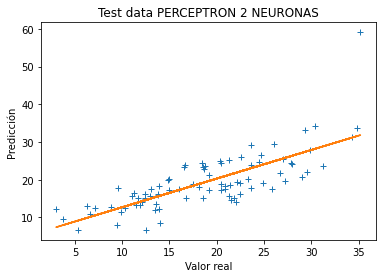

In [ ]:
# Dibujamos el ground truth vs las predicciones en los datos de entrenamiento
py_a_train = net_a(torch.FloatTensor(X_train))
y_pred_train = py_a_train.cpu().detach().numpy()
plotScatter(y_train, y_pred_train, "Training data PERCEPTRON 2 NEURONAS")

# Dibujamos el ground truth vs las predicciones en los datos de test
py_a_test = net_a(torch.FloatTensor(X_test))
y_pred_test = py_a_test.cpu().detach().numpy()
plotScatter(y_test, y_pred_test, "Test data PERCEPTRON 2 NEURONAS")

print ("MSE medio en training PERCEPTRON 2 NEURONAS: " + str(((y_train - y_pred_train)**2).mean()))
print ("MSE medio en test PERCEPTRON 2 NEURONAS: " + str(((y_test - y_pred_test)**2).mean()))

## PERCEPTRON B : 10 NEURONAS

Epoch 100, loss = 49.2358
Epoch 200, loss = 28.2491
Epoch 300, loss = 25.9778
Epoch 400, loss = 24.2742
Epoch 500, loss = 22.7561
Epoch 600, loss = 24.4799
Epoch 700, loss = 21.416
Epoch 800, loss = 21.0185
Epoch 900, loss = 20.0774
Epoch 1000, loss = 20.625
Epoch 1100, loss = 19.8791
Epoch 1200, loss = 20.9233
Epoch 1300, loss = 21.1847
Epoch 1400, loss = 19.033
Epoch 1500, loss = 18.9507
Epoch 1600, loss = 18.8299
Epoch 1700, loss = 19.0975
Epoch 1800, loss = 21.1181
Epoch 1900, loss = 18.5245
Epoch 2000, loss = 19.5178
Epoch 2100, loss = 18.0769
Epoch 2200, loss = 18.9872
Epoch 2300, loss = 17.919
Epoch 2400, loss = 18.0813
Epoch 2500, loss = 18.5906
Epoch 2600, loss = 17.6404
Epoch 2700, loss = 18.1411
Epoch 2800, loss = 18.2287
Epoch 2900, loss = 17.6967
Epoch 3000, loss = 17.7653
Epoch 3100, loss = 21.2566
Epoch 3200, loss = 18.3341
Epoch 3300, loss = 17.8704
Epoch 3400, loss = 17.5421
Epoch 3500, loss = 17.5131
Epoch 3600, loss = 17.2641
Epoch 3700, loss = 17.0618
Epoch 3800, lo

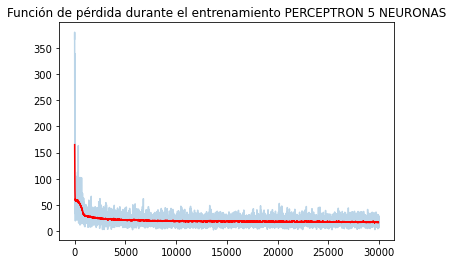

In [ ]:
# Tamaño del batch de entrenamiento
batch_size = 32

# Tasa de aprendizaje inicial para el gradiente descendente
learning_rate = 1e-3

# Definimos el modelo del perceptrón
net_b = Net(input_features = X_train.shape[1] , size_hidden = 10, n_output = 1) 

optimizer_b = torch.optim.Adam(net_b.parameters(), lr=learning_rate)

# Número de épocas
num_epochs = 5000

loss_list = []

# Bucle de entrenamiento
for i in range(num_epochs):

    total_loss = 0.0
    for x, y in loader:
        # Seteo en cero los gradientes de los parámetros a optimizar
        optimizer_b.zero_grad()

        # Realizo la pasada forward por la red
        prediccion = net_b(x)
        loss = criterion(prediccion, y)
        
        # Realizo la pasada backward por la red        
        loss.backward()
        
        # Actualizo los pesos de la red con el optimizador
        optimizer_b.step()

        # Me guardo el valor actual de la función de pérdida para luego graficarlo
        loss_list.append(loss.data.item())

        # Acumulo la loss del minibatch
        total_loss += loss.item() * y.size(0)

    # Normalizo la loss total   
    total_loss/= len(loader.dataset)

    # Muestro el valor de la función de pérdida cada 100 iteraciones        
    if i > 0 and i % 100 == 0:
        print('Epoch %d, loss = %g' % (i, total_loss))

# Muestro la lista que contiene los valores de la función de pérdida
# y una versión suavizada (rojo) para observar la tendencia
plt.figure()
loss_np_array = np.array(loss_list)
plt.plot(loss_np_array, alpha = 0.3)
N = 60
running_avg_loss = np.convolve(loss_np_array, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_loss, color='red')
plt.title("Función de pérdida durante el entrenamiento PERCEPTRON 5 NEURONAS");


MSE medio en training PERCEPTRON 5 NEURONAS: 16.198906
MSE medio en test PERCEPTRON 5 NEURONAS: 22.748585


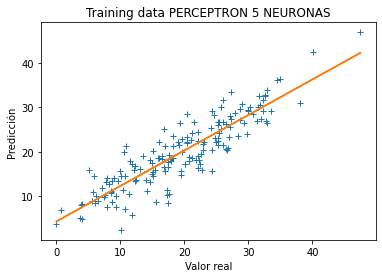

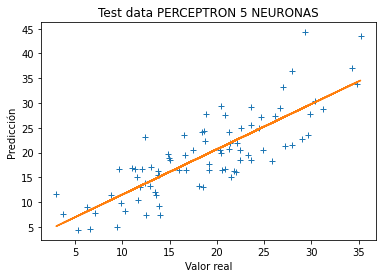

In [ ]:
# Dibujamos el ground truth vs las predicciones en los datos de entrenamiento
py = net_b(torch.FloatTensor(X_train))
y_pred_train = py.cpu().detach().numpy()
plotScatter(y_train, y_pred_train, "Training data PERCEPTRON 5 NEURONAS")

# Dibujamos el ground truth vs las predicciones en los datos de test
py = net_b(torch.FloatTensor(X_test))
y_pred_test = py.cpu().detach().numpy()
plotScatter(y_test, y_pred_test, "Test data PERCEPTRON 5 NEURONAS")

print ("MSE medio en training PERCEPTRON 5 NEURONAS: " + str(((y_train - y_pred_train)**2).mean()))
print ("MSE medio en test PERCEPTRON 5 NEURONAS: " + str(((y_test - y_pred_test)**2).mean()))

## PERCEPTRON C : 200 NEURONAS

Epoch 100, loss = 20.2293
Epoch 200, loss = 17.7516
Epoch 300, loss = 16.5054
Epoch 400, loss = 15.0491
Epoch 500, loss = 12.7879
Epoch 600, loss = 11.5696
Epoch 700, loss = 10.355
Epoch 800, loss = 12.5999
Epoch 900, loss = 11.7912
Epoch 1000, loss = 7.47539
Epoch 1100, loss = 10.6582
Epoch 1200, loss = 6.70023
Epoch 1300, loss = 4.69128
Epoch 1400, loss = 3.07783
Epoch 1500, loss = 2.25523
Epoch 1600, loss = 3.18242
Epoch 1700, loss = 1.7043
Epoch 1800, loss = 1.21874
Epoch 1900, loss = 1.60723
Epoch 2000, loss = 1.87854
Epoch 2100, loss = 2.78312
Epoch 2200, loss = 1.87978
Epoch 2300, loss = 1.59398
Epoch 2400, loss = 2.18675
Epoch 2500, loss = 0.781886
Epoch 2600, loss = 1.31222
Epoch 2700, loss = 0.426839
Epoch 2800, loss = 1.81888
Epoch 2900, loss = 2.27894
Epoch 3000, loss = 0.225309
Epoch 3100, loss = 0.333963
Epoch 3200, loss = 0.163124
Epoch 3300, loss = 0.196654
Epoch 3400, loss = 2.71574
Epoch 3500, loss = 0.561527
Epoch 3600, loss = 0.49285
Epoch 3700, loss = 0.50797
Epoch

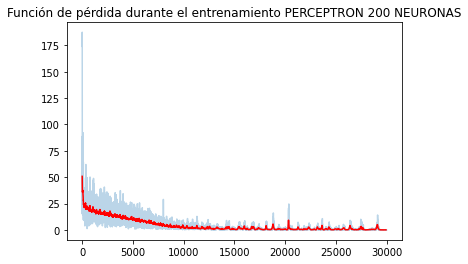

In [ ]:
# Tamaño del batch de entrenamiento
batch_size = 32

# Tasa de aprendizaje inicial para el gradiente descendente
learning_rate = 1e-3

# Definimos el modelo del perceptrón
net_c = Net(input_features = X_train.shape[1] , size_hidden = 200, n_output = 1) 

optimizer_c = torch.optim.Adam(net_c.parameters(), lr=learning_rate)

# Número de épocas
num_epochs = 5000

loss_list = []

# Bucle de entrenamiento
for i in range(num_epochs):

    total_loss = 0.0
    for x, y in loader:
        # Seteo en cero los gradientes de los parámetros a optimizar
        optimizer_c.zero_grad()

        # Realizo la pasada forward por la red
        prediccion = net_c(x)
        loss = criterion(prediccion, y)
        
        # Realizo la pasada backward por la red        
        loss.backward()
        
        # Actualizo los pesos de la red con el optimizador
        optimizer_c.step()

        # Me guardo el valor actual de la función de pérdida para luego graficarlo
        loss_list.append(loss.data.item())

        # Acumulo la loss del minibatch
        total_loss += loss.item() * y.size(0)

    # Normalizo la loss total   
    total_loss/= len(loader.dataset)

    # Muestro el valor de la función de pérdida cada 100 iteraciones        
    if i > 0 and i % 100 == 0:
        print('Epoch %d, loss = %g' % (i, total_loss))

# Muestro la lista que contiene los valores de la función de pérdida
# y una versión suavizada (rojo) para observar la tendencia
plt.figure()
loss_np_array = np.array(loss_list)
plt.plot(loss_np_array, alpha = 0.3)
N = 60
running_avg_loss = np.convolve(loss_np_array, np.ones((N,))/N, mode='valid')
plt.plot(running_avg_loss, color='red')
plt.title("Función de pérdida durante el entrenamiento PERCEPTRON 200 NEURONAS");


MSE medio en training PERCEPTRON 200 NEURONAS: 0.06368321
MSE medio en test PERCEPTRON 200 NEURONAS: 39.058064


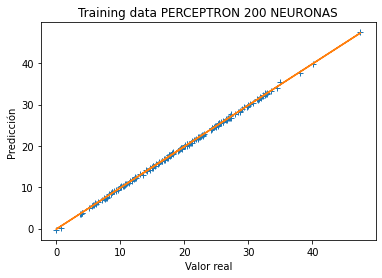

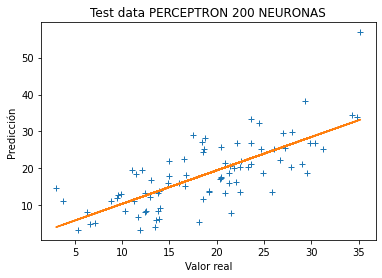

In [ ]:
# Dibujamos el ground truth vs las predicciones en los datos de entrenamiento
py = net_c(torch.FloatTensor(X_train))
y_pred_train = py.cpu().detach().numpy()
plotScatter(y_train, y_pred_train, "Training data PERCEPTRON 200 NEURONAS")

# Dibujamos el ground truth vs las predicciones en los datos de test
py = net_c(torch.FloatTensor(X_test))
y_pred_test = py.cpu().detach().numpy()
plotScatter(y_test, y_pred_test, "Test data PERCEPTRON 200 NEURONAS")

print ("MSE medio en training PERCEPTRON 200 NEURONAS: " + str(((y_train - y_pred_train)**2).mean()))
print ("MSE medio en test PERCEPTRON 200 NEURONAS: " + str(((y_test - y_pred_test)**2).mean()))

#### **CONCLUSIONES:**

- Observamos como a medida que aumentan la cantidad de neuronas en las capas ocultas, el tiempo de procesamiento aumenta.

- Observamos como el valor de la funcion de perdida para los datos de train logra minimizarse mucho mas al utilizar mayor cantidad de neuronas, 2 NEURONAS (loss = 77.3), 10 NEURONAS(loss = 15.38), 200 NEURONAS(loss = 9.97), utilizando la misma cantidad de epocas y learning rate.

- Observamos que a medida que aumentan la cantidad de neuronas en las capas ocultas, se logra reducir en menor cantidad de iteraciones el valor de la funcion de costo (datos de train). Perceptrones multicapa con mayor cantidad de neuronas en sus capas ocultas, reducen antes la variabilidad de la funcion de perdida. 

- Observamos que *la red que mejor performa en los datos de test, es la que posee **10 neuronas** en sus capas ocultas*, con un MSE de 20.58, la red neuronal multicapa que posee **200 neuronas** en sus capas ocultas, termina *overfitteando*, con un MSE de 32.28 para test y un MSE 0.023 para train. El caso mas simple del perceptron multicapa con **2 neuronas** obtiene un MSE en training de 77.30913 y un MSE medio en test de 57.762276.
